In [62]:
import matplotlib.pyplot as plt

import torch
torch.set_printoptions(precision=15, sci_mode=True)

from cheetah import (
    Segment,
    ParticleBeam,
    Drift,
    Quadrupole,
    BmadQuadrupole
)

from cheetah.bmadx.interface import (
    cheetah_particle_beam_to_bmadx_particle,
    bmadx_particle_to_cheetah_beam)

In [63]:
# test incoming beam
coords = torch.ones((1,10000,7), dtype=torch.float64)
coords[...,:-1] = torch.randn((1,10000,6), dtype=torch.float64)*1e-3
coords[...,5] *= 10
incoming_beam = ParticleBeam(
    particles=coords,
    energy=torch.tensor([1e7]),
    dtype=torch.float64
)
#incoming_beam = ParticleBeam.from_astra("../../tests/resources/ACHIP_EA1_2021.1351.001", dtype=torch.float64)
incoming_beam.energy = torch.ones_like(incoming_beam.energy) * 1e7
print(f'particles shape: {incoming_beam.particles.shape}')
print(f'energy: {incoming_beam.energy}')


particles shape: torch.Size([1, 10000, 7])
energy: tensor([1.000000000000000e+07], dtype=torch.float64)


In [64]:
# test if coord transormation is correct
bmadx_particle = cheetah_particle_beam_to_bmadx_particle(incoming_beam)
cheetah_beam = bmadx_particle_to_cheetah_beam(bmadx_particle)

In [65]:
torch.allclose(
    incoming_beam.particles, 
    cheetah_beam.particles, 
    rtol=1e-14, 
    atol=torch.finfo(torch.float64).eps*10
)

True

In [66]:
# quadrupoles
l_quad = torch.tensor(1.0)
k1_quad = torch.tensor(20.0)
cheetah_quad = Quadrupole([l_quad], [k1_quad], dtype=torch.float64)
bmad_quad = BmadQuadrupole([l_quad], [k1_quad], num_steps=10, dtype=torch.float64)

In [67]:
# segments
cheetah_segment = Segment(elements=[cheetah_quad])
bmad_segment = Segment(elements=[bmad_quad])

In [68]:
# tracking
cheetah_outgoing_beam = cheetah_segment.track(incoming_beam)
bmad_outgoing_beam = bmad_segment.track(incoming_beam)

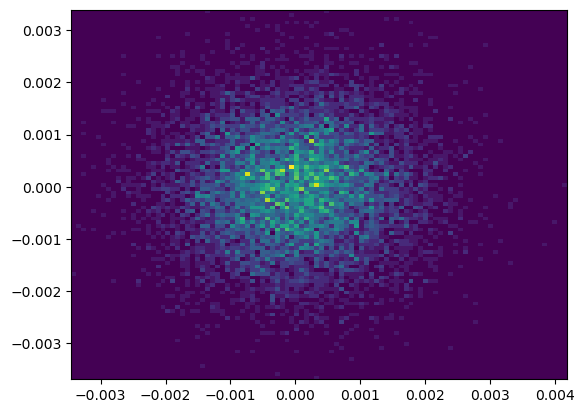

In [69]:
# initial y-py phase space
plt.hist2d(incoming_beam.particles[0,:,2], incoming_beam.particles[0,:,3], bins=100)
plt.show()

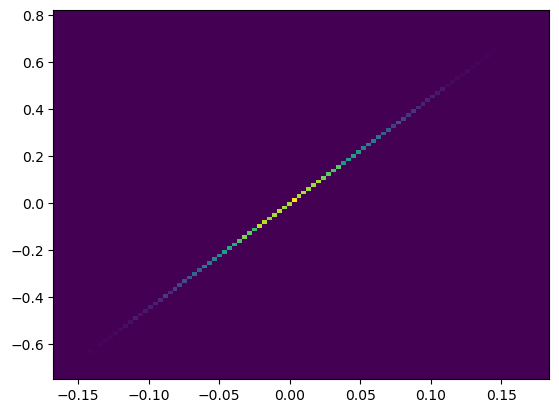

In [70]:
# Cheetah tracking output y-py phase space: no chromatic aberration
plt.hist2d(cheetah_outgoing_beam.particles[0,:,2], cheetah_outgoing_beam.particles[0,:,3], bins=100)
plt.show()

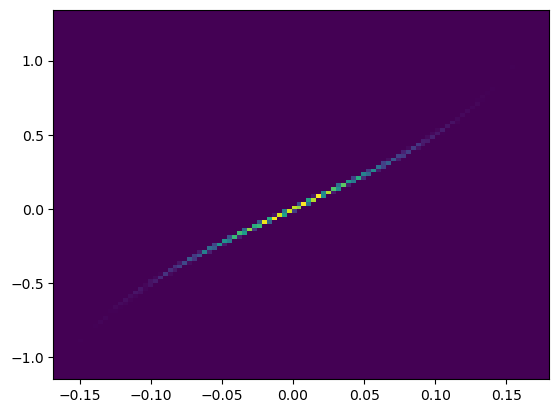

In [71]:
# Bmad tracking output y-py phase space: chromatic aberration
plt.hist2d(bmad_outgoing_beam.particles[0,:,2], bmad_outgoing_beam.particles[0,:,3], bins=100)
plt.show()